# Bracketing

This notebook was automatically generated from the Algorithms for Optimization source code. Each cell generates a figure from the original text. While this code is not optimized for use in lectures, we provide it here to be adapted for such projects. We hope you find it useful.

In [2]:
include("support_code.jl");

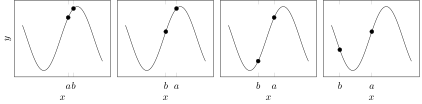

In [32]:
function find_initial_bracket(f::Function, x::Float64 = 0, s::Float64 = 1e-2, k::Float64 = 2.0)
    Channel{Tuple{Float64,Float64}}(1) do channel
        a, ya = x, f(x)
        b, yb = x + s, f(x + s)
        put!(channel, (a, b))
        if yb > ya
            a, ya, b, yb = b, yb, a, ya
            s = -s
        end

        while true
            c, yc = b + s, f(b + s)
            put!(channel, (a, c))
            if yc > yb
                return a < c ? (a, c) : (c, a)
            else
                a, ya, b, yb = b, yb, c, yc
                s *= k
            end
        end
    end
end

p = let
    N = 4
    g = GroupPlot(N, 1, groupStyle = "horizontal sep=0.25cm, ylabels at=edge left",
        style = "width=5cm, xlabel=\$x\$, ylabel=\$y\$, ytick=\\empty")

    f(x::Float64) = sin(x)
    x_arr = collect(range(3π / 2 - 2, stop = 3π / 2 + 5.5, length = 101))

    for (a, b) in find_initial_bracket(f, 7.0, 0.5, 2.0)
        ax = Axis([
                Plots.Linear(x_arr, f.(x_arr), style = "solid, black, mark=none"),
                Plots.Scatter([a, b], [f(a), f(b)], style = "black, mark=*, mark options={solid, draw=black, fill=black}"),
            ], style = "xtick={$a,$b}, xticklabels={\$a\$,\$b\$}, xticklabel style={text height=2ex}")

        push!(g, ax)
    end

    g
end

plot(p)

In [94]:
φ = MathConstants.φ

function fibonacci_search(f::Function, a::Float64, b::Float64, n::Int64; ϵ = 1e-2)
    s = (1 - √5) / (1 + √5)
    Channel{Tuple{Float64,Float64}}(1) do channel
        ρ = (1 - s^n) / (φ * (1 - s^(n + 1)))
        d = ρ * b + (1 - ρ) * a
        yd = f(d)
        for i in n-1:-1:1
            if i == 1
                c = ϵ * a + (1 - ϵ) * d
            else
                c = ρ * a + (1 - ρ) * b
            end
            yc = f(c)
            if yc < yd
                b, d, yd = d, c, yc
            else
                a, b = b, c
            end
            put!(channel, a < b ? (a, b) : (b, a))
            ρ = (1 - s^i) / (φ * (1 - s^(i + 1)))
        end
        return a < b ? (a, b) : (b, a)
    end
end

fibonacci_search (generic function with 1 method)

In [95]:
function golden_section_search(f::Function, a::Float64, b::Float64, n::Int64)
    ρ = φ - 1
    Channel{Tuple{Float64,Float64}}(1) do channel
        d = ρ * b + (1 - ρ) * a
        fd = f(d)
        for i = 1:n-1
            c = ρ * a + (1 - ρ) * b
            fc = f(c)
            if fc < fd
                b, d, fd = d, c, fc
            else
                a, b, fb = b, c, fc
            end
            put!(channel, a < b ? (a, b) : (b, a))
        end
        return a < b ? (a, b) : (b, a)
    end
end

golden_section_search (generic function with 1 method)

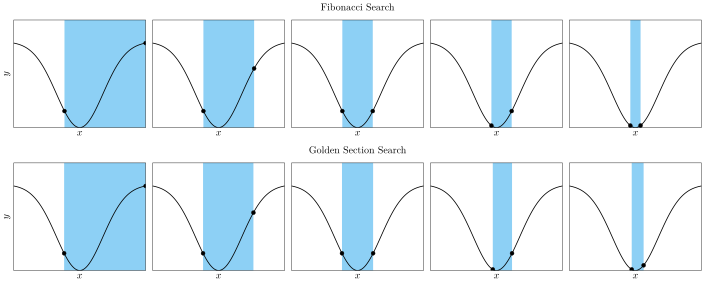

In [96]:
p = let

    f = x -> -exp(-x^2)
    a₀, b₀ = -2.0, 2.0
    lo, hi = -1.0, 0.25

    N = 5
    g = GroupPlot(N, 2, groupStyle = "horizontal sep=0.25cm, vertical sep=1.25cm, ylabels at=edge left",
        style = "clip marker paths, width=6.25cm, ymin=$lo, ymax=$hi, xmin=$a₀, xmax=$b₀, xlabel=\$x\$, ylabel=\$y\$, ytick=\\empty,  xtick=\\empty, axis on top=true")

    for (a, b) in fibonacci_search(f, a₀, b₀, N + 1)
        p = Plots.Plot[]
        push!(p, Plots.Linear(f, (a₀, b₀), style = "solid, thick, black, mark=none"))
        push!(p, Plots.Linear([a, a], [lo, hi], style = "name path=A, draw=none, mark=none"))
        push!(p, Plots.Linear([b, b], [lo, hi], style = "name path=B, draw=none, mark=none"))
        push!(p, Plots.Command("\\addplot[pastelBlue!50] fill between[of=A and B]"))
        push!(p, Plots.Scatter([a, b], [f(a), f(b)], style = "mark=*, mark size=2, mark options={solid, draw=black, fill=black}"))
        push!(g, Axis(p))
    end

    ###

    for (a, b) in golden_section_search(f, a₀, b₀, N + 1)
        p = Plots.Plot[]
        push!(p, Plots.Linear(f, (a₀, b₀), style = "solid, thick, black, mark=none"))
        push!(p, Plots.Linear([a, a], [lo, hi], style = "name path=A, draw=none, mark=none"))
        push!(p, Plots.Linear([b, b], [lo, hi], style = "name path=B, draw=none, mark=none"))
        push!(p, Plots.Command("\\addplot[pastelBlue!50] fill between[of=A and B]"))
        push!(p, Plots.Scatter([a, b], [f(a), f(b)], style = "mark=*, mark size=2, mark options={solid, draw=black, fill=black}"))
        push!(g, Axis(p))
    end

    g.axes[3].title = "Fibonacci Search"
    g.axes[8].title = "Golden Section Search"

    g
end

plot(p)

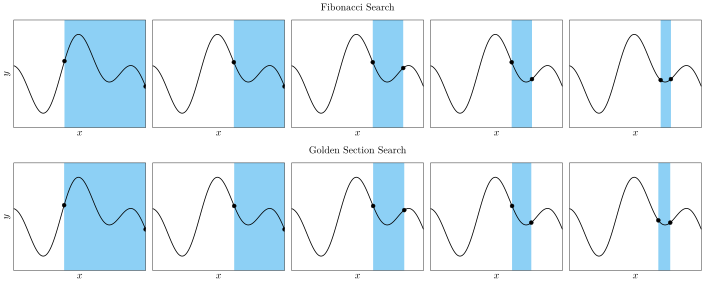

In [97]:

p = let
    f = x -> (sin(x) + sin(x / 2)) / 4
    a₀, b₀ = -5.0, 9.0
    lo, hi = -0.6, 0.6

    N = 5
    g = GroupPlot(N, 2, groupStyle = "horizontal sep=0.25cm, vertical sep=1.25cm, ylabels at=edge left",
        style = "clip marker paths, width=6.25cm, ymin=$lo, ymax=$hi, xmin=$a₀, xmax=$b₀, xlabel=\$x\$, ylabel=\$y\$, ytick=\\empty,  xtick=\\empty, axis on top=true")

    for (a, b) in fibonacci_search(f, a₀, b₀, N + 1)
        p = Plots.Plot[]
        push!(p, Plots.Linear(f, (a₀, b₀), style = "solid, thick, black, mark=none"))
        push!(p, Plots.Linear([a, a], [lo, hi], style = "name path=A, draw=none, mark=none"))
        push!(p, Plots.Linear([b, b], [lo, hi], style = "name path=B, draw=none, mark=none"))
        push!(p, Plots.Command("\\addplot[pastelBlue!50] fill between[of=A and B]"))
        push!(p, Plots.Scatter([a, b], [f(a), f(b)], style = "mark=*, mark size=2, mark options={solid, draw=black, fill=black}"))
        push!(g, Axis(p))
    end

    ###

    for (a, b) in golden_section_search(f, a₀, b₀, N + 1)
        p = Plots.Plot[]
        push!(p, Plots.Linear(f, (a₀, b₀), style = "solid, thick, black, mark=none"))
        push!(p, Plots.Linear([a, a], [lo, hi], style = "name path=A, draw=none, mark=none"))
        push!(p, Plots.Linear([b, b], [lo, hi], style = "name path=B, draw=none, mark=none"))
        push!(p, Plots.Command("\\addplot[pastelBlue!50] fill between[of=A and B]"))
        push!(p, Plots.Scatter([a, b], [f(a), f(b)], style = "mark=*, mark size=2, mark options={solid, draw=black, fill=black}"))
        push!(g, Axis(p))
    end

    g.axes[3].title = "Fibonacci Search"
    g.axes[8].title = "Golden Section Search"

    g
end

plot(p)

In [ ]:

   p = let

   		f = x->(x-1.25)^2 + 0.25
   		xpts = [0.3,1.0,1.75]

    	Axis([
    			Plots.Linear(f, (0.25,2), style="solid, black, mark=none"),
    			Plots.Scatter(xpts,f.(xpts), style="black, mark=*, mark options={solid, draw=black, fill=black}"),
    			Plots.Scatter([1.25], [f(1.25)], style="pastelBlue, mark=*, mark options={solid, draw=pastelBlue, fill=pastelBlue}"),
    		],
    		width="1.2*9cm", xlabel=L"x", ylabel=L"y", style="axis lines=middle, xtick=\\empty, ytick=\\empty",
    		xmin=0, xmax=2.25, ymin=0,
    	)
   end

   plot(p)

In [ ]:
p = let
	f = x->x - 2x^2 + 0.2x^3

	function get_q(a,b,c)
	    fa = f(a)
	    fb = f(b)
	    fc = f(c)
	    return x-> fa*(x-b)*(x-c)/((a-b)*(a-c)) +
	               fb*(x-a)*(x-c)/((b-a)*(b-c)) +
	               fc*(x-a)*(x-b)/((c-a)*(c-b))
	end

	function get_axis(a,b,c)

	    x = 0.5*(ya*(b^2-c^2)+yb*(c^2-a^2)+yc*(a^2-b^2)) /
	            (ya*(b-c)    +yb*(c-a)    +yc*(a-b))
	    yx = f(x)

	    Axis([Plots.Linear(f, (0,10), style="black, solid, mark=none"),
	      Plots.Scatter([a,b,c], f.([a,b,c]), style="mark=*, mark size=1.2, mark options={solid, draw=black, fill=black}"),
	    Plots.Scatter([x], [f(x)], style="mark=*, mark size=1.2, mark options={solid, draw=pastelBlue, fill=pastelBlue}"),
	      Plots.Linear(get_q(a,b,c), (0,10), style="pastelBlue, solid, mark=none"),
	      ], style="xtick={$a,$b,$c}, xticklabels={\$a\$,\$b\$,\$c\$}") #$
	end

	g = GroupPlot(4,1,groupStyle="horizontal sep=0.25cm, ylabels at=edge left",
			                    style="width=5cm, xlabel=\$x\$, ylabel=\$y\$, ytick=\\empty, ymin=-25, ymax=30, xmin=-1, xmax=11, xticklabel style={text height=2ex}")

	a = 0.5
	b = 4
	c = 9.75

	ya, yb, yc = f(a), f(b), f(c)

	for N in 1 : 4
	    push!(g, get_axis(a,b,c))

	    x = 0.5*(ya*(b^2-c^2)+yb*(c^2-a^2)+yc*(a^2-b^2)) /
	            (ya*(b-c)    +yb*(c-a)    +yc*(a-b))
	    yx = f(x)

	    a, b, c,ya, yb, yc = x > b ?
				(b, x, c, yb, f(x), yc) :
				(a, x, b, ya, f(x), yb)

	    if x > b
	        if yx > yb
	            c, yc = x, yx
	        else
	            a, ya, b, yb = b, yb, x, yx
	        end
	    elseif x < b
	        if yx > yb
	            a, ya = x, yx
	        else
	            c, yc, b, yv = b, yb, x, yx
	        end
	    end
	end

	g.axes[end].style *= ", xticklabels={{\\hspace{-4pt}\$a\$},{\\hspace{4pt}\$b\$},\$c\$}"

	g
end

plot(p)

In [ ]:
using Vec

p = let
	f = x-> 1.75 - (exp(-((x-2.5)^2)) + 1.25*exp(-0.5*(x-6)^2))

	a = 0.5
	b = 6.5

	function _get_shubert_piyavskii_intersection(A::VecE2, B::VecE2, L::Float64)
	    t = ((A.y - B.y) - L*(A.x - B.x)) / (2L)
	    A + VecE2(t, -t*L)
	end


	N = 1
	plots = Plots.Plot[]
	push!(plots, Plots.Linear(f, (a,b), xbins=151, style="solid, thick, black, mark=none", legendentry=L"f(x)"))

	L = 1.0
	x1 = (a+b)/2
	P1 = VecE2(x1, f(x1))
	δ1 = (b-a)/2
	pts = [VecE2(a, P1.y-L*δ1), P1, VecE2(b, P1.y-L*δ1)]
	push!(plots, Plots.Linear([P.x for P in pts], [P.y for P in pts], style="solid, thick, gray, mark=none", legendentry="lower bound"))
	push!(plots, Plots.Scatter([P1.x], [P1.y], style="mark=*, mark size=1.5, mark options={solid, draw=pastelBlue, fill=pastelBlue}"))

	A = P1 + VecE2(-1.0, -L*1.0)
	h = 1.0
	push!(plots, Plots.Linear([A.x, A.x, A.x-h/L], [A.y, A.y-h, A.y-h], style="solid, gray, mark=none"))
	push!(plots, Plots.Node(L"\ell",A.x,A.y-h/2, style="right"))
	push!(plots, Plots.Node(L"1",A.x-h/(2L),A.y-h, style="below"))


	Axis(plots, style="width=10cm, height=6cm, ymin=-2, ymax=2, xmin=$(a-0.5), xmax=$(b+0.5), xlabel=\$x\$, ylabel=\$y\$, xtick={$a, $((b+a)/2), $b}, xticklabels={\$a\$, \$x^{(1)}\$, \$b\$}, ytick=\\empty, legend pos=outer north east, xticklabel style={text height=2ex}")
end

plot(p)

In [ ]:
using Vec

p = let
	f = x-> 1.75 - (exp(-((x-2.5)^2)) + 1.25*exp(-0.5*(x-6)^2))

	a = 0.5
	b = 6.5

	function _get_shubert_piyavskii_intersection(A::VecE2, B::VecE2, L::Float64)
	    t = ((A.y - B.y) - L*(A.x - B.x)) / (2L)
	    A + VecE2(t, -t*L)
	end


	N = 1
	plots = Plots.Plot[]
	push!(plots, Plots.Linear(f, (a,b), xbins=151, style="solid, thick, black, mark=none", legendentry=L"f(x)"))

	L = 1.0
	x1 = (a+b)/2
	P1 = VecE2(x1, f(x1))
	δ1 = (b-a)/2
	pts = [VecE2(a, P1.y-L*δ1), P1, VecE2(b, P1.y-L*δ1)]


	N = 3
	for k in 2 : N
	    i = argmin([P.y for P in pts])
	    x = pts[i].x
	    P = VecE2(x, f(x))

	    if i == 1
	        pts[1] = P
	        insert!(pts, 2, _get_shubert_piyavskii_intersection(P, pts[2], L))
	    elseif i == length(pts)
	        pts[end] = P
	        insert!(pts, length(pts), _get_shubert_piyavskii_intersection(pts[end-1], P, L))
	    else
	        P_prev = _get_shubert_piyavskii_intersection(pts[i-1], P, L)
	        P_next = _get_shubert_piyavskii_intersection(P, pts[i+1], L)
	        deleteat!(pts, i)
	        insert!(pts, i, P_next)
	        insert!(pts, i, P)
	        insert!(pts, i, P_prev)
	    end
	end

	push!(plots, Plots.Linear([P.x for P in pts], [P.y for P in pts], style="solid, thick, gray, mark=none", legendentry="lower bound"))
	push!(plots, Plots.Scatter([P.x for P in pts[1:2:end]], [P.y for P in pts[1:2:end]], style="mark=*, mark size=1.5, mark options={solid, draw=pastelBlue, fill=pastelBlue}"))

	i = argmin([P.y for P in pts])
	x = pts[i].x
	P = VecE2(x, f(x))
	P_prev = _get_shubert_piyavskii_intersection(pts[i-1], P, L)
	P_next = _get_shubert_piyavskii_intersection(P, pts[i+1], L)

	push!(plots, Plots.Linear([P_prev.x, P.x, P_next.x], [P_prev.y, P.y, P_prev.y], style="solid, thick, pastelBlue, mark=none"))
	push!(plots, Plots.Scatter([P.x], [P.y], style="mark=*, mark size=1.5, mark options={solid, draw=pastelBlue, fill=pastelBlue}"))
	push!(plots, Plots.Command("\\draw[->, ] ($x,$(pts[i].y + 0.2)) -- ($x,$(P.y - 0.2))"))

	xticks = "$a, $(pts[3].x), $(P.x), $b"
	xticklabels = "\$a = x^{(2)}\$, \$x^{(1)}\$, \$x^{(4)}\$, \$b = x^{(3)}\$"

	Axis(plots, style="width=10cm, height=6cm, ymin=-0.75, ymax=2, xmin=$(a-0.5), xmax=$(b+0.5), xlabel=\$x\$, ylabel=\$y\$, xtick={$xticks}, xticklabels={$xticklabels}, ytick=\\empty, legend pos=outer north east, xticklabel style={text height=2ex}")
end

plot(p)

In [ ]:
using Vec

p = let

	f = x-> 1.75 - (exp(-((x-2.5)^2)) + 1.25*exp(-0.5*(x-6)^2))

	a = 0.5
	b = 6.5

	function _get_shubert_piyavskii_intersection(A::VecE2, B::VecE2, L::Float64)
	    t = ((A.y - B.y) - L*(A.x - B.x)) / (2L)
	    A + VecE2(t, -t*L)
	end
	function get_shubert_piyavskii_axis(N)

	    plots = Plots.Plot[]

	    push!(plots, Plots.Linear(f, (a,b), xbins=151, style="solid, thick, black, mark=none"))

	    L = 1.0
	    x1 = (a+b)/2
	    P1 = VecE2(x1, f(x1))
	    δ1 = (b-a)/2
	    pts = [VecE2(a, P1.y-L*δ1), P1, VecE2(b, P1.y-L*δ1)]

	    for k in 2 : N
	        i = argmin([P.y for P in pts])
	        x = pts[i].x
	        P = VecE2(x, f(x))

	        if i == 1
	        	pts[1] = P
	        	insert!(pts, 2, _get_shubert_piyavskii_intersection(P, pts[2], L))
	        elseif i == length(pts)
	        	pts[end] = P
	        	insert!(pts, length(pts), _get_shubert_piyavskii_intersection(pts[end-1], P, L))
	        else
	        	P_prev = _get_shubert_piyavskii_intersection(pts[i-1], P, L)
	        	P_next = _get_shubert_piyavskii_intersection(P, pts[i+1], L)
	        	deleteat!(pts, i)
	        	insert!(pts, i, P_next)
	        	insert!(pts, i, P)
	        	insert!(pts, i, P_prev)
	       	end
	    end

	    push!(plots, Plots.Linear([P.x for P in pts], [P.y for P in pts], style="solid, gray, mark=none"))

	    # now plot the intersections
	    offset = pts[2].y < pts[1].y ? 1 : 2

	    i = offset + 2*(argmin([P.y for P in pts[offset:2:end]]) - 1)
	    xmin = pts[i].x
	    ymin = pts[i].y

	    for j in (offset == 1 ? 2 : 1) : 2 : length(pts)
	        if pts[j].y < ymin
	            xj = pts[j].x
	            delta = ymin - pts[j].y
	            x_lo = max(a, xj-delta/L)
	            x_hi = min(b, xj+delta/L)
	            push!(plots, Plots.Linear([x_lo,x_hi],[ymin,ymin], style="pastelBlue, ultra thick, solid, mark=none"))
	        end
	    end

	    Axis(plots)
	end

	g = GroupPlot(3,3,groupStyle="horizontal sep=0.25cm, vertical sep=0.25cm, xlabels at=edge bottom, ylabels at=edge left",
	                    style="width=5cm, ymin=0, ymax=2, xmin=$(a-0.5), xmax=$(b+0.5), xlabel=\$x\$, ylabel=\$y\$, xtick=\\empty, ytick=\\empty")

	for N in 1 : 9
	    push!(g, get_shubert_piyavskii_axis(N))
	end

	g
end

plot(p)

In [ ]:
p = let
	N = 4

	f = x-> (sin(x) + sin(x/2))/4
	a₀, b₀ = -5.0, 9.0
	a, b = a₀, b₀
	ya = f(a)
	yb = f(b)

	g = GroupPlot(N,1,groupStyle="horizontal sep=0.25cm, ylabels at=edge left",
	                  style="clip marker paths, width=4.25cm, ymin=-0.6, ymax=0.6, xmin=$a₀, xmax=$b₀, xlabel=\$x\$, ylabel=\$f'\$, ytick={0}, yticklabels=\\empty, xtick=\\empty, axis on top=true")

	for i in 1 : N

	    x = (a+b)/2
	    y = f(x)
	    if y == 0
	        a, b = x, x
	    elseif sign(y) == sign(ya)
	        a = x
	    else
	        b = x
	    end

	    p = Plots.Plot[]
	    push!(p, Plots.Linear([a₀, b₀], [0,0], style="solid, black!70, mark=none"))
	    push!(p, Plots.Linear(f, (a₀, b₀), style="solid, thick, black, mark=none"))
	    push!(p, Plots.Linear([a,a], [-0.6,0.6], style="name path=A, draw=none, mark=none"))
	    push!(p, Plots.Linear([b,b], [-0.6,0.6], style="name path=B, draw=none, mark=none"))
	    push!(p, Plots.Command("\\addplot[pastelBlue!50] fill between[of=A and B]"))
	    push!(p, Plots.Scatter([a,b], [f(a), f(b)], style="mark=*, mark size=1, mark options={solid, draw=black, fill=black}"))

	    push!(g, Axis(p)) # style="xtick={$a,$b}, xticklabels={\$a\$,\$b\$}"
	end

	g
end

plot(p)